In [1]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

# from statsmodels.graphics.tsaplots import plot_acf
# from statsmodels.tsa.stattools import adfuller
# from scipy.ndimage.interpolation import shift

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.ensemble import GradientBoostingClassifier
%matplotlib inline

In [2]:
# Versões dos pacotes usados no notebook

%reload_ext watermark
%watermark -a "César S. Hooper/ Novembro 2022" --iversions
!python --version

Author: César S. Hooper/ Novembro 2022

numpy      : 1.19.5
matplotlib : 3.3.4
statsmodels: 0.12.2
sklearn    : 0.24.1
cv2        : 4.5.4-dev
pandas     : 1.2.4

Python 3.8.8


In [3]:
path = 'C:/Users/Cesar Hooper/Desktop/github/bolsa_chile/resumen.csv'

In [4]:
datos = pd.read_excel('micro emini ES 08-07 18_43.xls', sheet_name='30 mins - 20 D')
datos.head(2)

,HORA,OPEN,HIGH,LOW,CLOSE,VOLUME,Unnamed: 6,Vol,ADX1,C,...,..4,..5,..6,..7,..8,..9,..10,..11,c>34,..12
0,18:00,4211.0,4211.5,4207.5,4207.75,2545,NaN,2545,4207.75,4207.75,...,▲,▲,NaN,NaN,NaN,NaN,NaN,NaN,▲,NaN
1,18:30,4208.0,4208.5,4206.5,4207.75,1651,NaN,1651,99.95,4207.75,...,▲,▲,NaN,NaN,NaN,NaN,NaN,NaN,▲,NaN


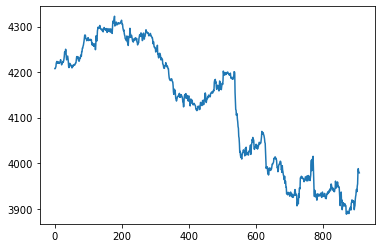

In [5]:
close = datos['CLOSE'];
time = datos['HORA']
datos['CLOSE'].plot();

-1.9987723214285604 -1790.89999999999


Text(0.5, 1.0, 'Close - media móvil')

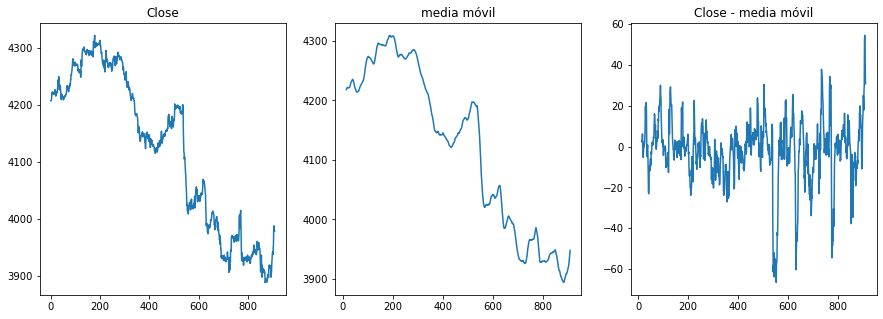

In [6]:
# restar la media móvil. de qué tamaño debe ser la ventana??
# media móvil: mm. OJO: VENTANA!!!
ventana = 15
mm = close.rolling(window=ventana).mean()
close_mm = close - mm
print(close_mm.mean(), close_mm.sum())
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
close.plot()
plt.title('Close')
plt.subplot(1, 3, 2)
mm.plot()
plt.title('media móvil')
plt.subplot(1, 3, 3)
close_mm.plot()
plt.title('Close - media móvil')


In [17]:
close--

910

In [18]:
len(close_mm[ventana-1::])

896

In [12]:
# close_mm = close_mm.dropna()
dataset = creaDataset(close_mm, 5, 1, 1)


In [39]:
y_test.sort_index().index

Int64Index([ 18,  19,  24,  26,  29,  30,  32,  33,  34,  38,
            ...
            877, 880, 885, 886, 887, 891, 892, 893, 902, 903],
           dtype='int64', length=268)

In [44]:
## relación entre los datos test y los datos originales
k = 877
close[k+5], close_mm[k+5] + mm[k+5], dataset['target'][k] + mm[k+5], y_test[k]+ mm[k+5]

(3902.75, 3902.75, 3902.75, 3902.75)

In [46]:
y_train.sort_index().index

Int64Index([ 14,  15,  16,  17,  20,  21,  22,  23,  25,  27,
            ...
            890, 894, 895, 896, 897, 898, 899, 900, 901, 904],
           dtype='int64', length=623)

In [50]:
## relación entre los datos test y los datos originales
for k in [17, 22,890, 21]:
    print(close[k+5], close_mm[k+5] + mm[k+5], dataset['target'][k] + mm[k+5], y_train[k]+ mm[k+5])

4220.0 4220.0 4220.0 4220.0
4228.5 4228.5 4228.5 4228.5
3903.75 3903.75 3903.75 3903.75
4224.5 4224.5 4224.5 4224.5


In [31]:
data = dataset.dropna()

In [32]:
y = data['target'];
X = data.drop('target', axis=1);

## Creación modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [51]:
## creación y entrenamiento del modelo
y = data['target'];
X = data.drop('target', axis=1);

## Creación modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Vamos a escalar los datos. 
# Crea el objeto y fitea
scaler = StandardScaler()
scaler.fit(X_train)

# normaliza los datos. tf: transformados o escalados
X_train_tf = scaler.transform(X_train)
X_test_tf = scaler.transform(X_test)

# trinamento do modelo
rfr = RandomForestRegressor(n_estimators=1000, max_depth=50)
rfr.fit(X_train_tf, y_train)

# aplicação do modelo
y_train_pred= rfr.predict(X_train_tf)
y_test_pred = rfr.predict(X_test_tf)

In [52]:
resultados = pd.DataFrame(columns=['y_test_pred', 'y_test'])
resultados_train = pd.DataFrame(columns=['y_train', 'y_train_pred'])

resultados['y_test'] = y_test
resultados['y_test_pred'] = y_test_pred
resultados_train['y_train'] = y_train
resultados_train['y_train_pred'] = y_train_pred

In [53]:
linear_model_train = ols('y_train ~ y_train_pred', data=resultados_train).fit()
print(linear_model_train.summary())

                            OLS Regression Results                            
Dep. Variable:                y_train   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                 2.350e+04
Date:                Sat, 03 Dec 2022   Prob (F-statistic):               0.00
Time:                        23:18:58   Log-Likelihood:                -1447.9
No. Observations:                 623   AIC:                             2900.
Df Residuals:                     621   BIC:                             2909.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0831      0.100      0.830   

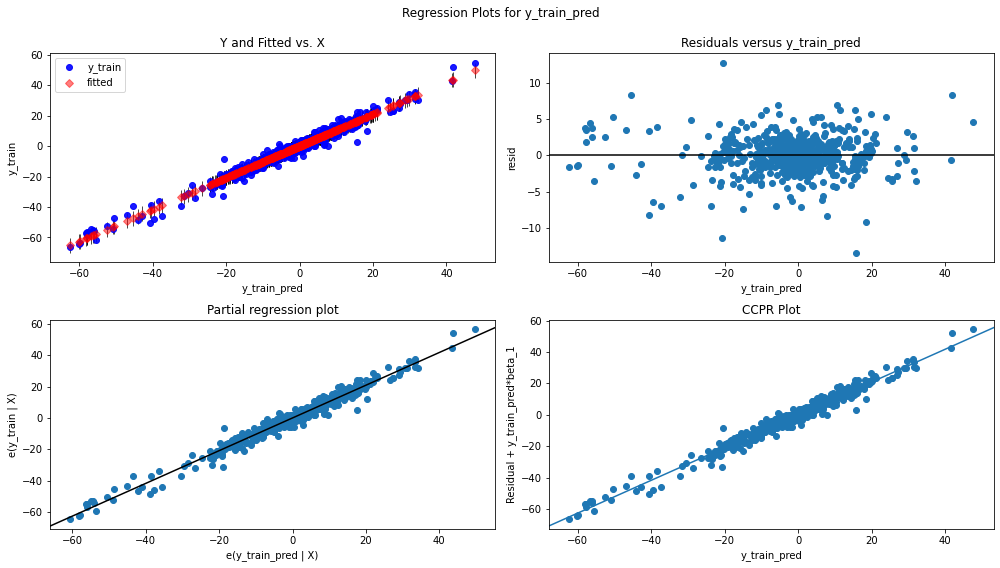

In [54]:
fig = plt.figure(figsize=(14, 8))
fig = sm.graphics.plot_regress_exog(linear_model_train, 'y_train_pred', fig=fig)

In [55]:
linear_model = ols('y_test ~ y_test_pred', data=resultados).fit()
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 y_test   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     1530.
Date:                Sat, 03 Dec 2022   Prob (F-statistic):          2.63e-112
Time:                        23:19:08   Log-Likelihood:                -867.62
No. Observations:                 268   AIC:                             1739.
Df Residuals:                     266   BIC:                             1746.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.3003      0.381     -0.788      

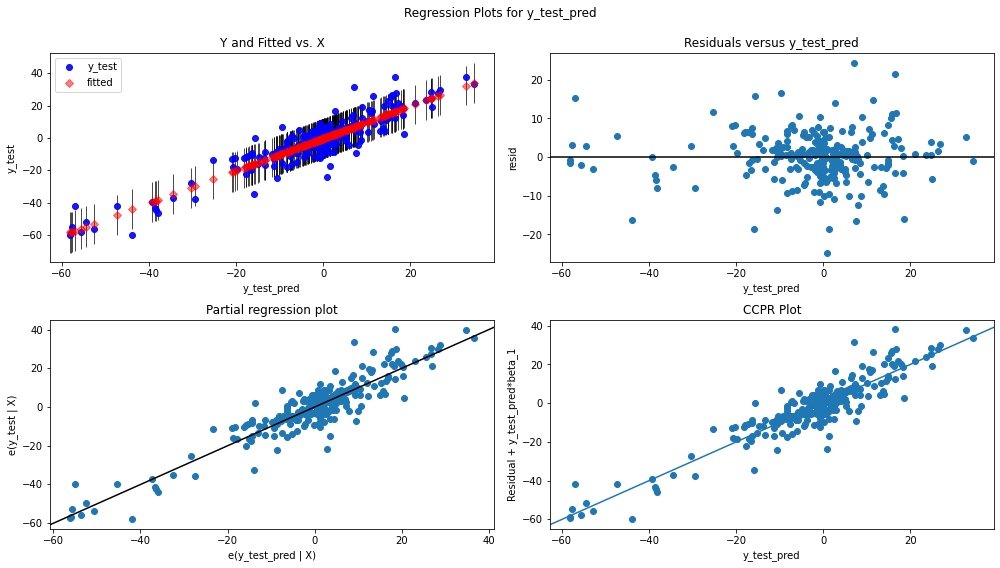

In [56]:
fig = plt.figure(figsize=(14, 8))
fig = sm.graphics.plot_regress_exog(linear_model, 'y_test_pred', fig=fig)

In [ ]:
resultados.sort_index()
resultados['time'] =  time[resultados.index]

In [ ]:
resultados = resultados[['time', 'y_test', 'y_test_pred']]
resultados['mediaMovil'] = mm[resultados.index]
resultados

In [ ]:
k = 571
delta = ventana + 5
foda = pd.DataFrame({'close': close, 'close_mm': close_mm, 
                     'mm': mm})
foda.head(10)

In [ ]:
close[442], mm[442], y_test[442]

In [61]:
df = criaDataFrame(y_test, y_test_pred, time, mm, dim=5)

In [65]:
df = df.sort_index()
df

,time,precioReal,precioPredicho
16,02:00,4218.50,4217.631833
19,03:30,4221.25,4220.622167
20,04:00,4222.50,4223.294450
30,09:00,4227.00,4232.937367
31,09:30,4231.25,4230.892650
...,...,...,...
889,05:30,3897.75,3904.659267
891,06:30,3906.50,3904.743733
896,09:00,3942.25,3942.082033
898,10:00,3949.75,3938.710283


In [78]:
indices = df.index;
utilidad = pd.DataFrame({'real': [df['precioReal'][indice[k]] - df['precioReal'][indice[k-1]] for k in range(len(indices))]})

TypeError: 'int' object is not subscriptable

In [77]:
indices[2-1]

19

In [75]:
k = 0
for u in range(len(indices)):
    k += 1
k

268

In [60]:
def criaDataFrame(valorReal, valorPredicho, time, mediaMovil, dim=5):
    
    """
    crea los dataframes con los resultados de la regresión
    comando: cria_dataFrames(valor_real, valor_predicho, time, mediaMovil, Dimension)
    retorna DF 
    
    a. valorReal contiene los índices del dataframe    

    """
    
    
    # cargando los índices de los resultados
    indices = valorReal.index;
    
    # convirtiendo valorPredicho en Serie
    valorPredicho = pd.Series(valorPredicho, index=indices);
    
    # crea DF
    precios = pd.DataFrame(columns=['time', 'precioReal', 'precioPredicho'], index=indices)
    
    # corrección índices de resultados con valores reales
    tau = 5
    
    real = []
    predicho = []
    tiempo = []
    
    for index in indices:
#         print(valorReal.loc[index] + mediaMovil.loc[index + tau])
        real.append(valorReal.loc[index] + mediaMovil.loc[index + tau]);
        predicho.append(valorPredicho.loc[index] + mediaMovil.loc[index + tau]);
#         tiempo.append(time[index + tau]);
    
    
    precios['precioReal'] = real;
    precios['precioPredicho'] = predicho;
    precios['time'] = time.loc[indices];

    
    return precios
    

In [9]:
def creaDataset(dados, dim, step, pred):
    
    """
    Cria dataset a partir de uma serie de tempo ---
    
    -- dados: serie de tempo
    -- dim: dimensão do vector
    -- step: intercalado para seleção dos dados
    -- pred: dia target para prever
    -- return: retorna dataframe com vetores e target
    """
   
    N = len(dados)
    
    if ((dim-1)*step+pred)>N: print('Problemas com Dimensões dos objetos')
    
    dataset = pd.DataFrame(columns=['x'+str(u) for u in range(dim)])
    targets = []
    
    k = 0
    while True:
        
        if (k + (dim-1)*step + pred) == N: break 
        else:             
            dataset.loc[k] = [dados[u] for u in range(k, k + (dim-1)*step + 1, step)]
            targets.append(dados[k + (dim-1)*step + pred])
            k += 1    
    
    dataset['target'] = targets
    
    return dataset
        